# ANU ASTR4004 2024 - Week 7 (17+19 September 2024)

Author: Dr Sven Buder (sven.buder@anu.edu.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing-of-Data-Files" data-toc-modified-id="Preprocessing-of-Data-Files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing of Data Files</a></span><ul class="toc-item"><li><span><a href="#CSV-Files-(or-worse:-Excel)" data-toc-modified-id="CSV-Files-(or-worse:-Excel)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>CSV Files (or worse: Excel)</a></span></li><li><span><a href="#FITS-Files" data-toc-modified-id="FITS-Files-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>FITS Files</a></span></li></ul></li><li><span><a href="#Working-with-Data-Catalogues" data-toc-modified-id="Working-with-Data-Catalogues-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Working with Data Catalogues</a></span><ul class="toc-item"><li><span><a href="#Downloading-Data-via-ADQL/SQL" data-toc-modified-id="Downloading-Data-via-ADQL/SQL-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Downloading Data via ADQL/SQL</a></span></li><li><span><a href="#Joining-2-catalogues" data-toc-modified-id="Joining-2-catalogues-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Joining 2 catalogues</a></span></li><li><span><a href="#Visualising-targets-with-ipyaladin" data-toc-modified-id="Visualising-targets-with-ipyaladin-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualising targets with ipyaladin</a></span></li></ul></li><li><span><a href="#Can-I-observe-that-from-Siding-Spring-Observatory?" data-toc-modified-id="Can-I-observe-that-from-Siding-Spring-Observatory?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Can I observe that from Siding Spring Observatory?</a></span></li></ul></div>

If you want to get an automatic Table of Contents as above and codefolding, you can install notebook extensions for jupyter:

```bash
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
```

Then navigate to the "Nbextensions" bar when you start Jupyter and look for "Table of Contents (2)" as well as "Codefolding"  
Note: You might have to tweak a few setting to avoid numbering Notebook headers like the one above

In [1]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

## Preprocessing of Data Files

### CSV Files (or worse: Excel)

In [2]:
# Option 1: Pandas

import pandas as pd
# data_from_excel = pd.read_excel('excel_filename.xslx')
galah_data = pd.read_csv('data/galah_dr3_allstar_m67_lite.csv')
galah_data[:5] # let's just display the first 5 rows

,tmass_id,sobject_id,dr3_source_id,flag_sp,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h
0,08520715+1149254,131217003901002,604906737317927296,0,6025.8040,82.919060,4.154162,0.182165,-0.092624,0.070014,0
1,08512296+1149131,131217003901022,604917732434325248,0,6415.1600,84.775009,4.209819,0.182216,-0.084781,0.092447,0
2,08513012+1143498,131217003901063,604910310730772992,1,5991.9200,82.115155,3.980560,0.196921,-0.072373,0.068488,0
3,08512033+1145523,131217003901081,604911341522929536,0,6007.7817,80.506650,3.973353,0.186000,-0.122556,0.064773,0
4,08514268+1146365,131217003901110,604916731706106752,0,5718.2666,75.889717,4.008145,0.179610,-0.702105,0.055919,0


In [3]:
# Option 2: Astropy

from astropy.table import Table
galah_data = Table.read('data/galah_dr3_allstar_m67_lite.csv')
galah_data[:5] # let's just display the first 5 rows

tmass_id,sobject_id,dr3_source_id,flag_sp,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h
str16,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64
08520715+1149254,131217003901002,604906737317927296,0,6025.804,82.91905965852722,4.1541624,0.18216475987029215,-0.09262371,0.07001416519071464,0
08512296+1149131,131217003901022,604917732434325248,0,6415.16,84.7750087963104,4.2098193,0.18221560714532228,-0.08478117,0.09244745268009283,0
08513012+1143498,131217003901063,604910310730772992,1,5991.92,82.11515545187801,3.9805598,0.1969210017938334,-0.07237339,0.06848785671379515,0
08512033+1145523,131217003901081,604911341522929536,0,6007.7817,80.50664999999921,3.9733527,0.1859996020339389,-0.12255621,0.06477301699757515,0
08514268+1146365,131217003901110,604916731706106752,0,5718.2666,75.88971743000845,4.0081453,0.179609942164367,-0.70210457,0.055918992523516536,0


### FITS Files

also check out the astropy tutorials: https://learn.astropy.org/tutorials/FITS-cubes.html

In [4]:
# You might need to download a file (if you have not already)
import os

file_path = 'data/reduced_TAN_C14.fits'

if not os.path.exists(file_path):
    try:
        import wget
        wget.download(
            url = 'http://data.astropy.org/tutorials/FITS-cubes/reduced_TAN_C14.fits',
            out = file_path
        )
    except:
        print('Could not download FITS file')

In [5]:
from astropy.io import fits

# or for FITS data tables:
# from astropy.table import Table

In [6]:
# Images
fits_file = fits.open('data/reduced_TAN_C14.fits')
print(fits_file)

In [7]:
#fits_file is now a list of objects, each one corresponding to a different extension
print('This file has {0} extensions.'.format(len(fits_file)))

This file has 1 extensions.


In [8]:
#we can also just dump information for this fits file
print(fits_file.info())

Filename: data/reduced_TAN_C14.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   (150, 150, 450)   float32   
None


In [9]:
#print the header for the Primary Extension
print(fits_file[0].header.items)

<bound method Header.items of SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  150                                                  
NAXIS2  =                  150                                                  
NAXIS3  =                  450                                                  
OBJECT  = 'HI4PI   '           / The HI 4-PI Survey                             
TELESCOP= 'Effelsberg 100m RT; ATNF Parkes 64-m' / Telescope names              
ORIGIN  = 'AIfA/MPIfR Bonn; ATNF Sydney' / Organisations or Institutions        
REFERENC= 'HI4PI Collaboration 2016' / A&A                                      
RESTFRQ =        1420405751.77                                                  
RESTWAV =       0.211061140541                                                 

In [10]:
# Now let's extract the header and data 
fits_data = fits_file[0].data
fits_header = fits_file[0].header

# don't forget to close the fits_file to free up memory
fits_file.close()

In [11]:
# Translate pixels to Ra/Dec 

# RA and Dec come in AXIS1 and AXIS2
naxis1 = fits_header['NAXIS1']  # Number of pixels along the RA axis
naxis2 = fits_header['NAXIS2']  # Number of pixels along the Dec axis

# It is good practice to report FITS measurements in an agreed reference frame, the
# World Coordinate System (WCS)
from astropy.wcs import WCS
wcs = WCS(fits_header, naxis=2)

In [12]:
# Imagine you want to just zoom in onto the SMC: 
import astropy.units as u
# Define the desired latitude and longitude range
lat_range = [-46, -40] * u.deg  # GLAT range
lon_range = [306, 295] * u.deg  # GLON range

# Using the WCS object to convert world coordinates (GLON, GLAT) to pixel coordinates

# Convert (GLON_min, GLAT_min) and (GLON_max, GLAT_max) to pixel coordinates
glon_min_pix, glat_min_pix = wcs.world_to_pixel_values(lon_range[0], lat_range[0])  # Lower-left corner
glon_max_pix, glat_max_pix = wcs.world_to_pixel_values(lon_range[1], lat_range[1])  # Upper-right corner

# Convert to integer pixel coordinates for slicing
glon_min_pix = int(np.floor(glon_min_pix))
glon_max_pix = int(np.ceil(glon_max_pix))
glat_min_pix = int(np.floor(glat_min_pix))
glat_max_pix = int(np.ceil(glat_max_pix))

sub_wcs = wcs.deepcopy()  # Make a copy of the original WCS
sub_wcs.wcs.crpix[0] -= glon_min_pix  # Adjust reference pixel for GLON
sub_wcs.wcs.crpix[1] -= glat_min_pix  # Adjust reference pixel for GLAT

sub_data_cube = fits_data[:, glat_min_pix:glat_max_pix, glon_min_pix:glon_max_pix] * u.K

In [13]:
# Let's estimate the 0th and 1st Moments, i.e. Intensity Map and Intensity-weighted Velocity Map 

cdelt3 = fits_header['CDELT3'] * u. m / u.s  # Velocity increment per channel (e.g., km/s)
crval3 = fits_header['CRVAL3'] * u. m / u.s  # Velocity value at the reference pixel
crpix3 = fits_header['CRPIX3']  # Reference pixel (1-based index in FITS)

# Create the velocity axis (1D array for velocity channels)
n_channels = sub_data_cube.shape[0]  # Number of velocity channels
velocity_axis = ((np.arange(n_channels) - (crpix3 - 1)) * cdelt3 + crval3)

# Select velocity between -300 and 300 km/s
velocity_select = (velocity_axis > -300 * u.km/u.s) & (velocity_axis < 302 * u.km/u.s)

# Calculate the zeroth moment: integral of I delta_v = sum(I * cdelt3)
intensity_sum = np.nansum(sub_data_cube[velocity_select,:,:], axis=0) * cdelt3

# Calculate the first moment (intensity-weighted mean velocity)
# i.e. weighted sum of velocities / sum of intensities

# Weighted sum of velocities = sum(I * velocity-center * cdelt3)
# Note: velocity center has to be offset by half a bin from velocity_axis
weighted_velocity_sum = np.nansum(sub_data_cube[velocity_select,:,:] * (velocity_axis[velocity_select, np.newaxis, np.newaxis] + 0.5 * cdelt3) * cdelt3, axis=0)

# Calculate the first moment (intensity-weighted mean velocity)
intensity_weighted_mean_velocity = np.where(intensity_sum > 0, weighted_velocity_sum / intensity_sum, np.nan)

# Convert Intensity sum to a Column Density assuming optically thin media
# Following Eq. (2) of this paper: https://www.aanda.org/articles/aa/pdf/2016/10/aa29178-16.pdf
hi_column_density = (intensity_sum * 1.823 * 10**18 / (u.cm * u.cm) * u.s / u.K / u.km).to(1/u.cm**2)

If you want to read more about this, check out the HI4PI paper: https://ui.adsabs.harvard.edu/abs/2016A%26A...594A.116H/abstract  
(or ask Naomi McClure-Griffiths here at ANU, one of the co-authors, and lead of the Parkes Radio observations of this amazing project)

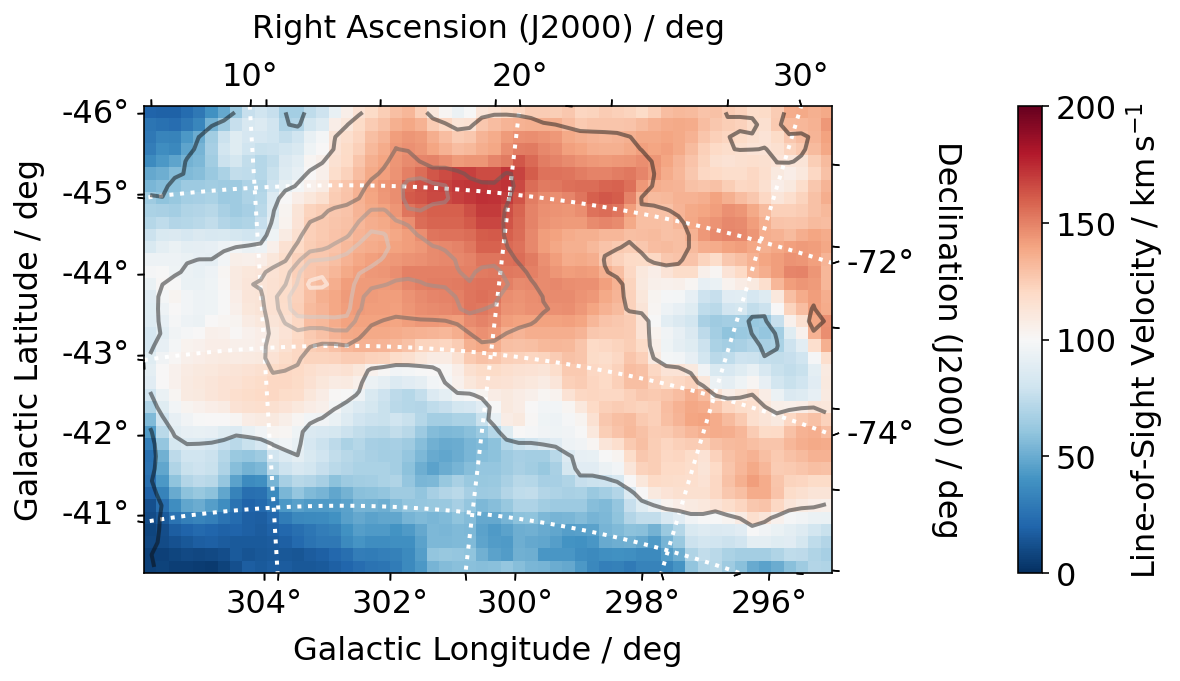

In [14]:
# Let's do some fun plotting! 

fig, ax = plt.subplots(1,1,figsize=(10, 5),subplot_kw={'projection': sub_wcs})

# image = ax.imshow(data_slice, origin='lower', cmap='RdBu_r', aspect='auto')
image = ax.imshow(intensity_weighted_mean_velocity.to(u.km/u.s).value, origin='lower', cmap='RdBu_r', vmin=0, vmax=200)

# Add a colorbar
cbar = plt.colorbar(image, pad = 0.15)
cbar.set_label(r'Line-of-Sight Velocity / $\mathrm{km\,s^{-1}}$', size=16)

# Add axes labels
ax.set_xlabel("Galactic Longitude / deg", fontsize=16)
ax.set_ylabel("Galactic Latitude / deg", fontsize=16)
ax.set_ylim(ax.get_ylim()[::-1])

# Overplot column density contours 
levels = (1e20, 5e20, 1e21, 3e21, 5e21, 7e21, 1e22)  # Define contour levels to use
ax.contour(hi_column_density.value, cmap='Greys_r', alpha=0.5, levels=levels)

# Overlay set of RA/Dec Axes
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted', lw=2)
overlay[0].set_axislabel('Right Ascension (J2000) / deg', fontsize=16)
overlay[1].set_axislabel('Declination (J2000) / deg', fontsize=16)

plt.tight_layout()

# This is adjusted from a tutorial of the astropy collaboration: https://learn.astropy.org/tutorials/FITS-cubes.html

In [15]:
overlay.

SyntaxError: invalid syntax (2010176894.py, line 1)

## Working with Data Catalogues

### Downloading Data via ADQL/SQL

In [ ]:
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord

In [ ]:
# Step 1: Define the SMC central coordinates and search radius
smc_center = SkyCoord(ra=13.158*u.deg, dec=-72.800*u.deg, frame='icrs')  # Approximate center of the SMC
search_radius = 2.0 * u.deg  # Define the radius for the SMC (can adjust as needed)

# Step 2: Define the Gaia query
query = f"""
SELECT TOP 1000 * 
FROM gaiadr3.gaia_source 
WHERE 1=CONTAINS(POINT('ICRS', ra, dec),
                 CIRCLE('ICRS', {smc_center.ra.degree}, {smc_center.dec.degree}, {search_radius.to(u.deg).value}))
ORDER BY phot_g_mean_mag ASC
"""

# Step 3: Execute the query
job = Gaia.launch_job_async(query)
gaiadr3_smc_top1000 = job.get_results()

In [ ]:
f, ax = plt.subplots()

ax.scatter(
    res
)

### Joining 2 catalogues

In [ ]:
from astropy.table import Table, join

### Visualising targets with ipyaladin

You can find ipyaladin at https://github.com/cds-astro/ipyaladin

In [ ]:
from ipyaladin import Aladin
aladin = Aladin()
aladin